# **Airline Passenger Satisfaction**
[데이터셋](https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction?select=train.csv)



```
- Gender: Gender of the passengers (Female, Male)

- Customer Type: The customer type (Loyal customer, disloyal customer)

- Age: The actual age of the passengers
 
- Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

- Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

- Flight distance: The flight distance of this journey

- Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

- Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

- Ease of Online booking: Satisfaction level of online booking

- Gate location: Satisfaction level of Gate location

- Food and drink: Satisfaction level of Food and drink

- Online boarding: Satisfaction level of online boarding

- Seat comfort: Satisfaction level of Seat comfort

- Inflight entertainment: Satisfaction level of inflight entertainment

- On-board service: Satisfaction level of On-board service

- Leg room service: Satisfaction level of Leg room service

- Baggage handling: Satisfaction level of baggage handling

- Check-in service: Satisfaction level of Check-in service

- Inflight service: Satisfaction level of inflight service

- Cleanliness: Satisfaction level of Cleanliness

- Departure Delay in Minutes: Minutes delayed when departure

- Arrival Delay in Minutes: Minutes delayed when Arrival

- Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)
```



In [1]:
# libraries for data handling
import numpy as np 
import pandas as pd 

# kaggle specific library for reading data
import os

# libraries for data visualisation 
import matplotlib.pyplot as plt
import seaborn as sns

#set style of graphs
sns.set_style("whitegrid")


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# import data
train = pd.read_csv("/content/drive/MyDrive/data/airtrain.csv")
test = pd.read_csv("/content/drive/MyDrive/data/airtest.csv")

Mounted at /content/drive


In [3]:
print(train.shape)
print(test.shape)

(103904, 25)
(25976, 25)


In [4]:
train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [5]:
train.drop(["Unnamed: 0","id"], axis = 1, inplace = True)
test.drop(["Unnamed: 0","id"], axis = 1, inplace = True)

In [6]:
train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [7]:
test.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [9]:
satisfaction_dummy = pd.get_dummies(train["satisfaction"], drop_first = True)

train = pd.concat([train, satisfaction_dummy], axis = 1)

In [10]:
train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,satisfied
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,4,3,4,4,5,5,25,18.0,neutral or dissatisfied,0
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,5,3,1,4,1,1,6.0,neutral or dissatisfied,0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,4,3,4,4,4,5,0,0.0,satisfied,1
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,5,3,1,4,2,11,9.0,neutral or dissatisfied,0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,4,4,3,3,3,0,0.0,satisfied,1


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [12]:
air_num = train.select_dtypes(include=['int64','float64','uint8'])
air_num.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfied
0,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0
1,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0
2,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1
3,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0
4,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1


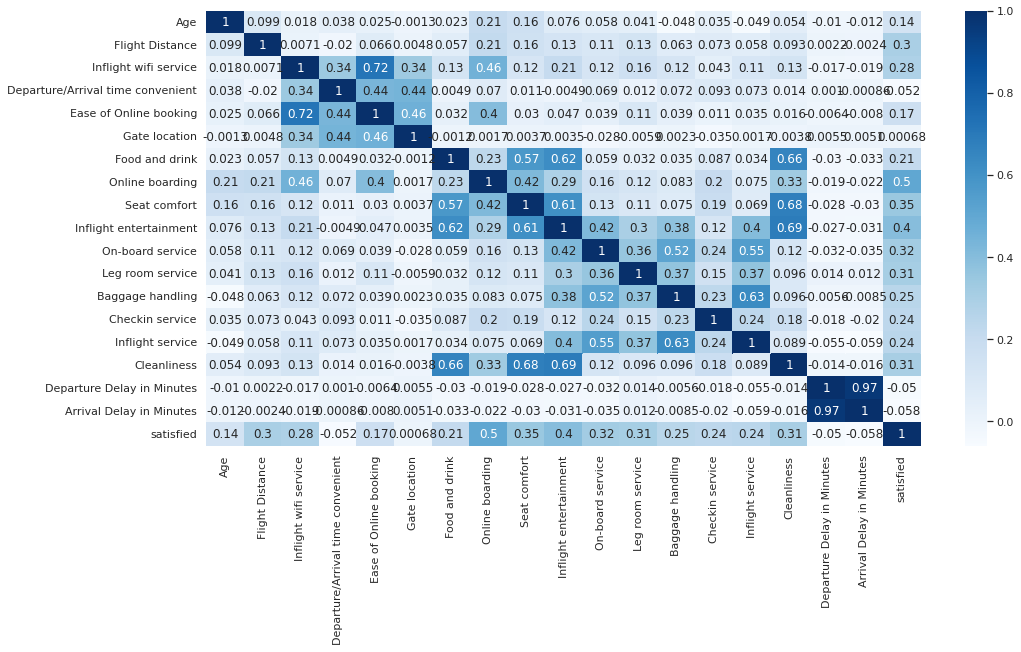

In [13]:
# correlation matrix
cor = air_num.corr()
cor
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.set(font_scale = 1)
sns.heatmap(cor, cmap="Blues", annot=True)
plt.show()

출발 시간 딜레이 랑 도착 시간 딜레이 너무 연관 크다

둘 중 하나의 열 없애도 되지 않을까? Multicollinearity 발생가능성 줄이기

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


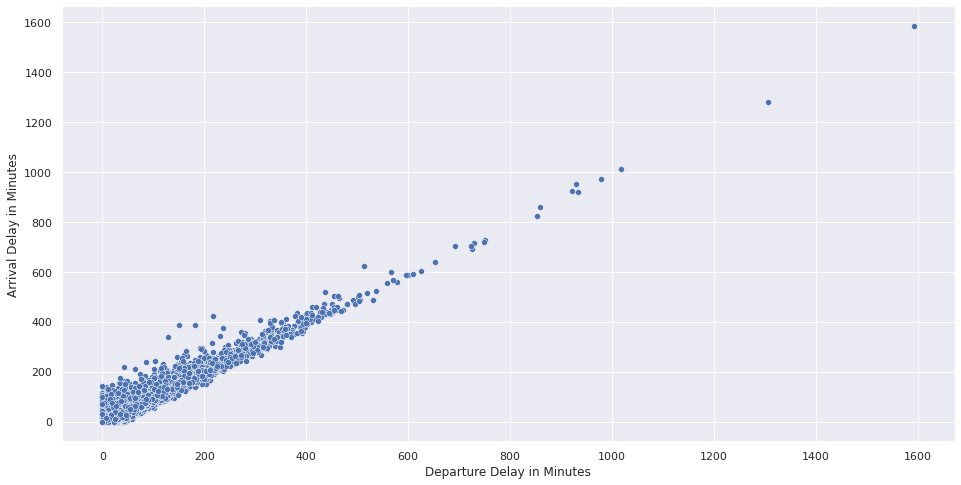

In [14]:
plt.figure(figsize=(16,8))
sns.scatterplot('Departure Delay in Minutes','Arrival Delay in Minutes', data=train,  palette = 'coolwarm')
plt.show()

In [15]:
np.mean(train['Departure Delay in Minutes'] - train['Arrival Delay in Minutes'])

-0.4307392320018534

# EDA

## Y

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


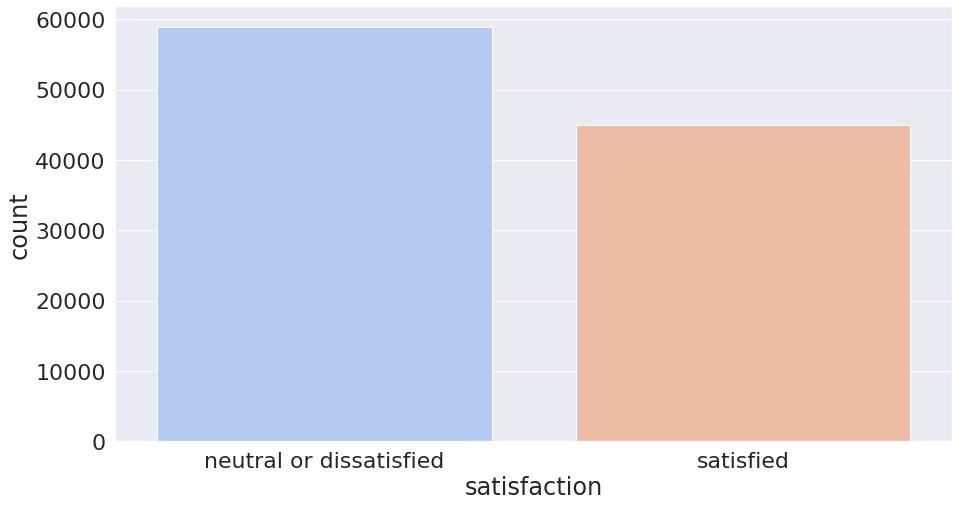

In [16]:
plt.figure(figsize=(15, 8))
sns.set(font_scale = 2)
sns.countplot('satisfaction', data = train,  palette = 'coolwarm')
plt.show()

SMOTE 안해도 되겠다

## Y 랑 출발 연기 시간

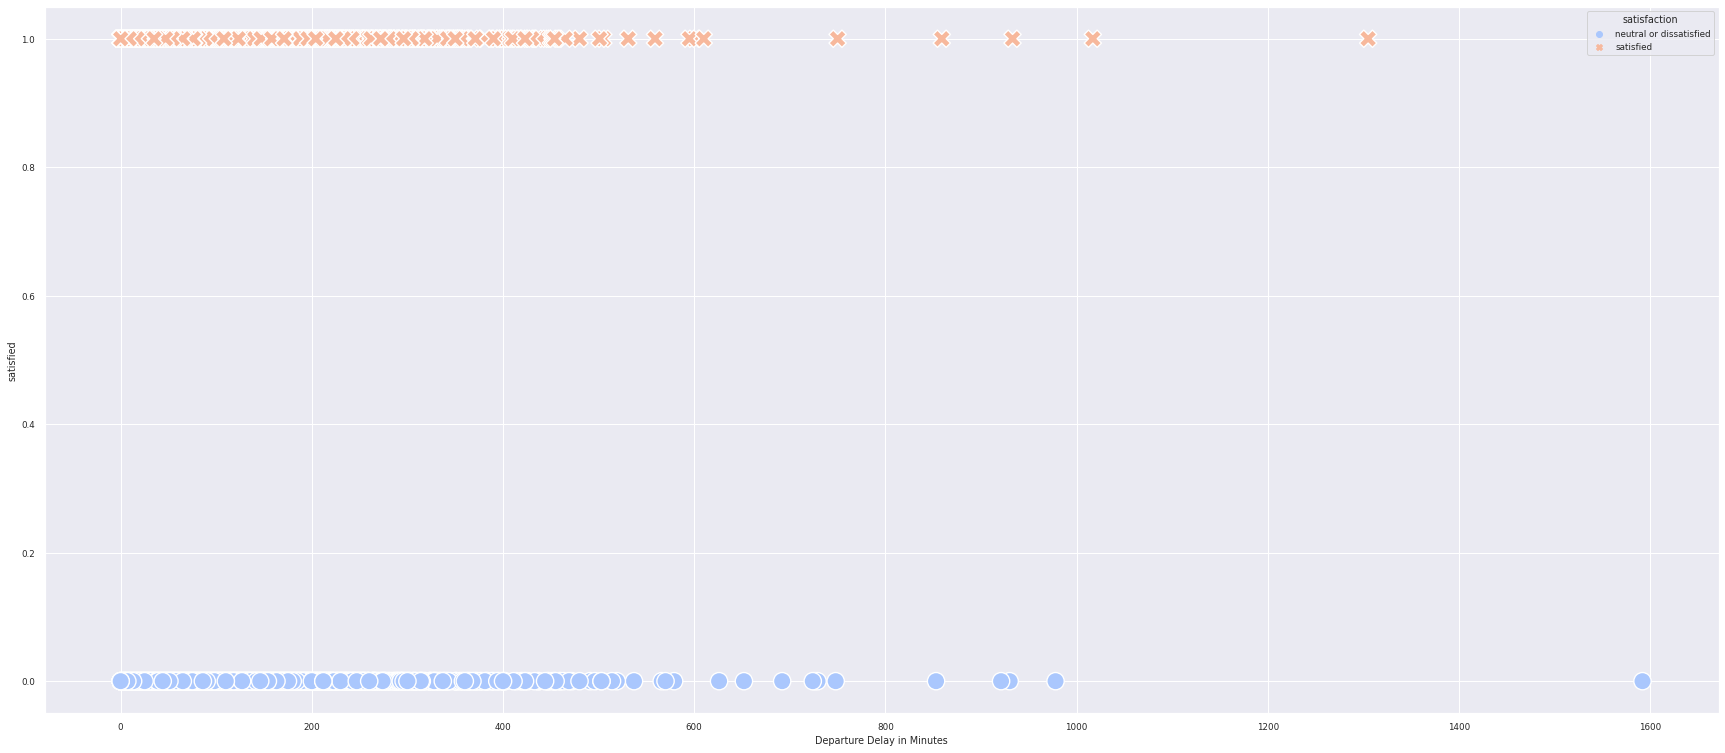

In [17]:
plt.figure(figsize=(30,13))
sns.set(font_scale =0.8)
sns.scatterplot(x= 'Departure Delay in Minutes', y= 'satisfied'  , data= train, hue='satisfaction', style='satisfaction', s=300,  palette = "coolwarm")
plt.show()

Delay 시간은 만족도와 큰 상관관계 업는듯

## Y랑 비행 거리

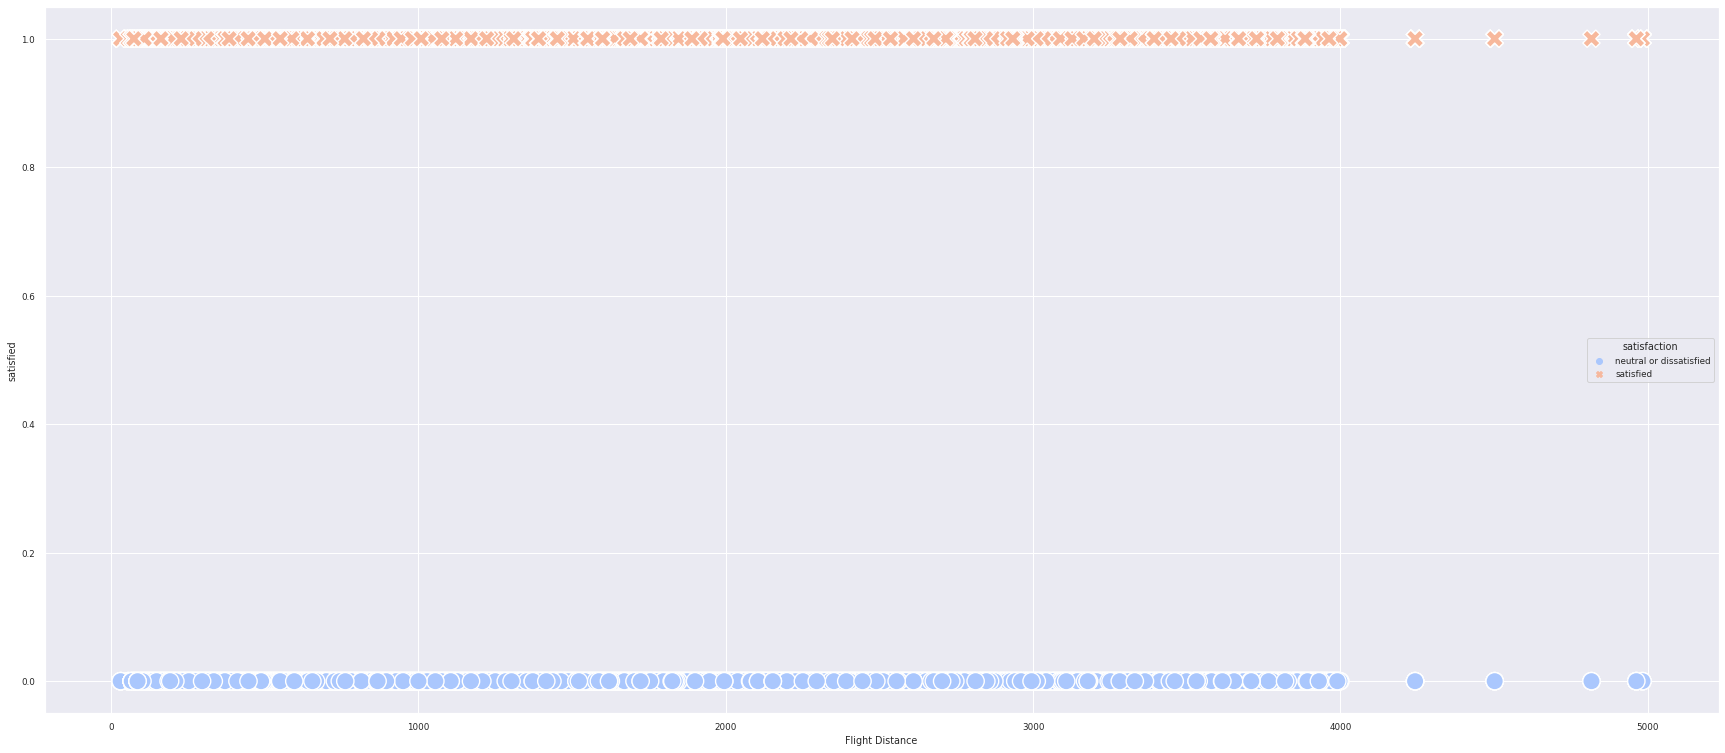

In [18]:
plt.figure(figsize=(30,13))
sns.set(font_scale =0.8)
sns.scatterplot(x= 'Flight Distance' , y= 'satisfied'  , data= train, hue='satisfaction', style='satisfaction', s=300,  palette = "coolwarm")
plt.show()

## Y랑 좌석 클래스 

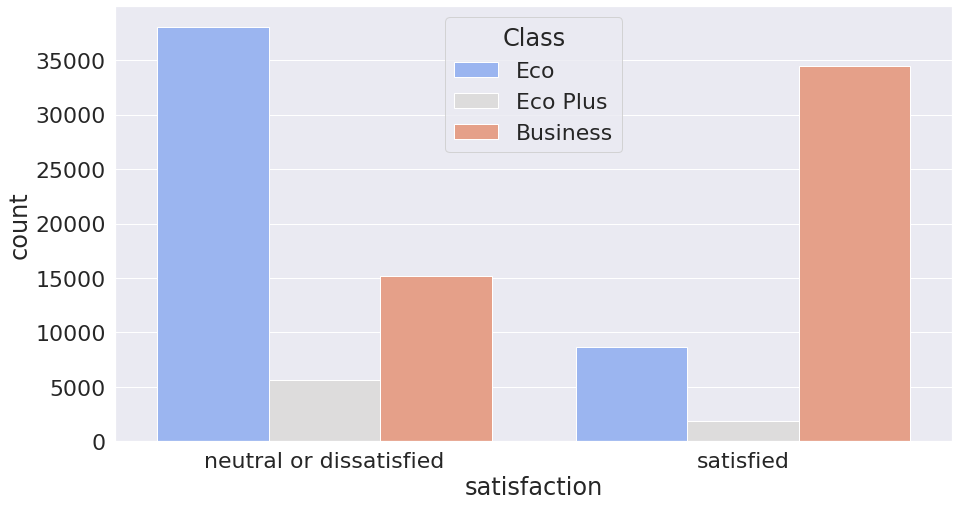

In [19]:
plt.figure(figsize=(15,8))
sns.set(font_scale = 2)
sns.countplot(x = 'satisfaction', hue = 'Class', palette = 'coolwarm', data = train, hue_order = ['Eco','Eco Plus', 'Business'])
plt.show()

이코노미, 이코노미 플러스, 비즈니스 순을 높은듯

- 확실히 높은 클래스(비즈니스)일 때, 만족도가 높음
- 낮은 클래스(에코)일 수록 만족도가 낮음


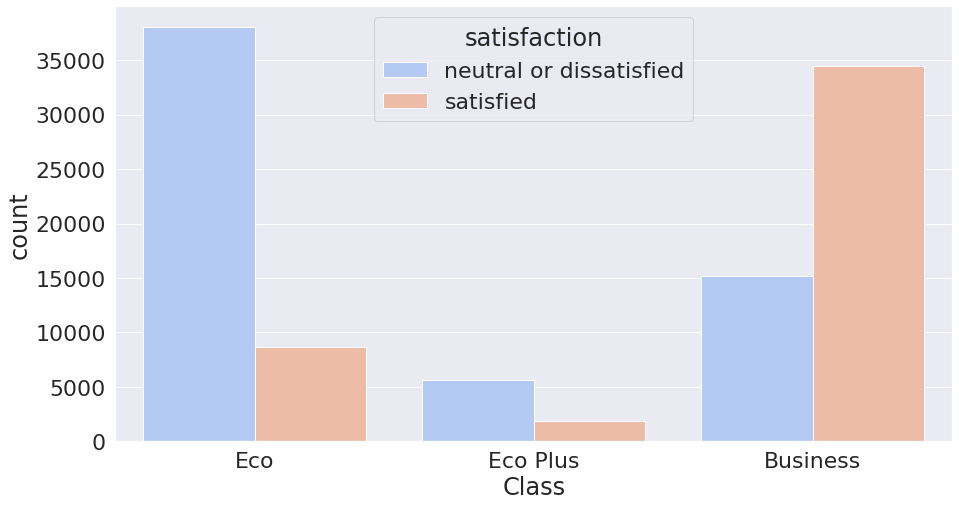

In [20]:
plt.figure(figsize=(15,8))
sns.countplot(x = 'Class', hue = 'satisfaction', palette = 'coolwarm', data = train, order = ['Eco','Eco Plus', 'Business'])
plt.show()

## Y랑 성별

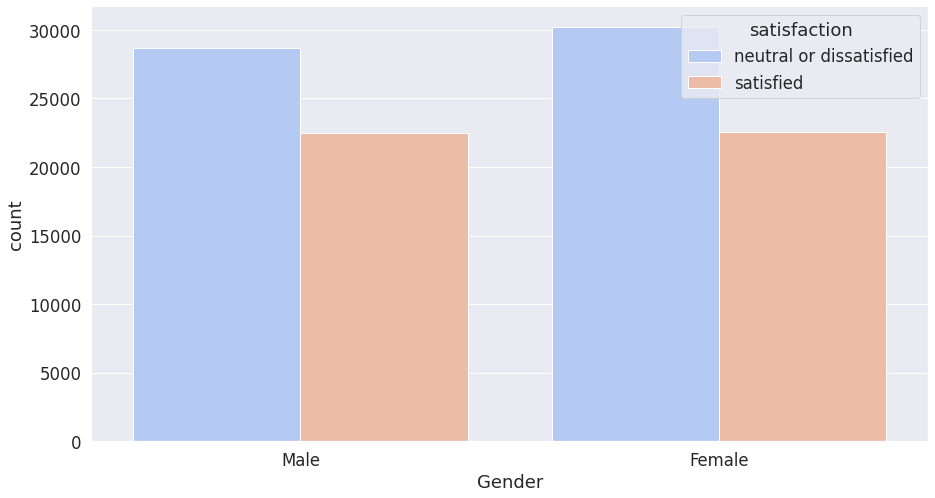

In [21]:
plt.figure(figsize=(15,8))
sns.set(font_scale = 1.5)
sns.countplot(x = 'Gender', hue = 'satisfaction', palette = "coolwarm", data = train)
plt.show()

## Y랑 고객 타입

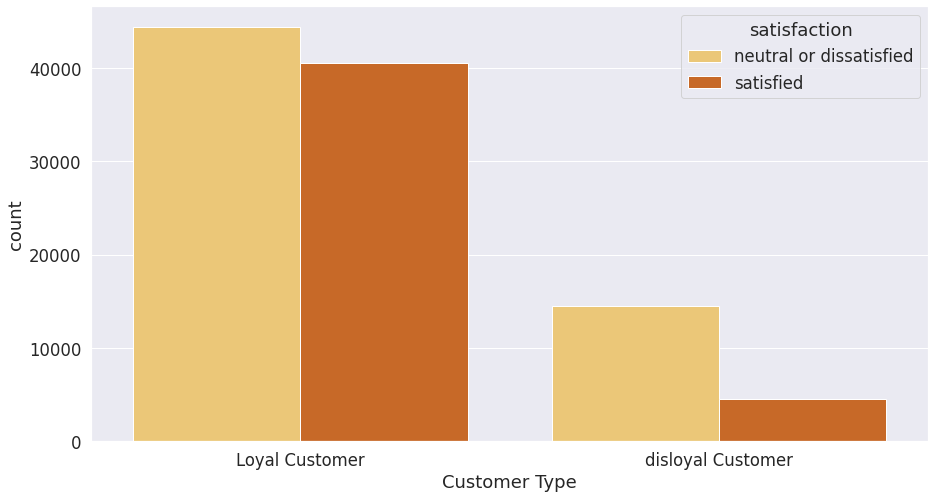

In [22]:
plt.figure(figsize=(15,8))
sns.countplot(x = 'Customer Type', hue = 'satisfaction', palette = "YlOrBr", data = train)

## Y랑 여행목적

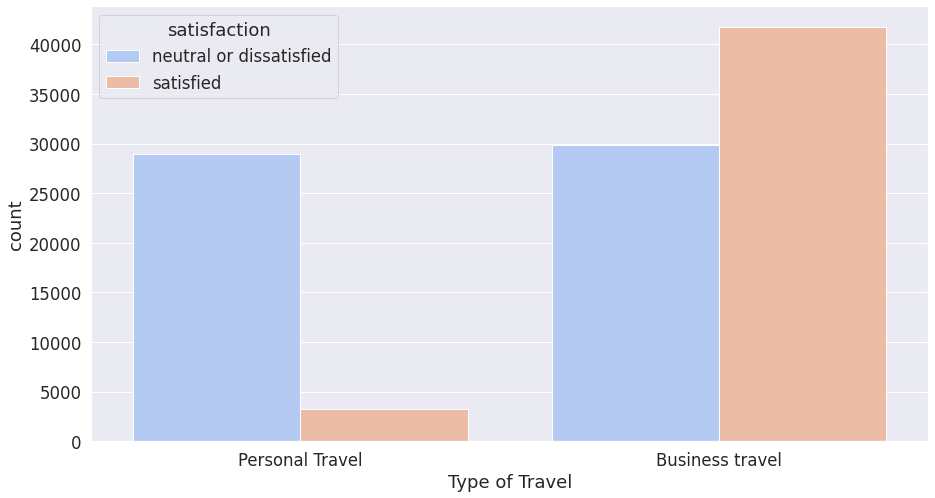

In [23]:
plt.figure(figsize=(15,8))
sns.countplot(x = 'Type of Travel', hue = 'satisfaction', palette = "coolwarm", data = train)
plt.show()

개인 여행 은 불만족이 많음

# **1-1 결측치 처리**


In [24]:
train.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
satisfied                              0
dtype: int64

아가 D랑 A의 상관성이 크니까 그냥 A drop 시키기

In [25]:
train.drop("Arrival Delay in Minutes", axis = 1, inplace = True)

In [26]:
train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction,satisfied
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,neutral or dissatisfied,0
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,neutral or dissatisfied,0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,satisfied,1
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,neutral or dissatisfied,0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,satisfied,1


# **1-2 이상치 확인**

In [27]:
air_num = train.select_dtypes(include=['int64','float64','uint8'])
air_num.columns

Index(['Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'satisfied'],
      dtype='object')

In [28]:
pd.concat([air_num.describe().iloc[:,[1,2]], air_num.describe().iloc[:,[-3]]], axis=1)

,Flight Distance,Inflight wifi service,Cleanliness
count,103904.000000,103904.000000,103904.000000
mean,1189.448375,2.729683,3.286351
std,997.147281,1.327829,1.312273
min,31.000000,0.000000,0.000000
25%,414.000000,2.000000,2.000000
50%,843.000000,3.000000,3.000000
75%,1743.000000,4.000000,4.000000
max,4983.000000,5.000000,5.000000


- Age : 7 ~ 85 (타당)
- Flight Distance : 31 ~ 4983
- Departure Delay in Minutes : 0 ~ 12 (1592)  : 이상치 제거 해야하나?

# **2 파생변수**



In [29]:
train['Departure Delay in Hours'] = round(train['Departure Delay in Minutes']/60,1)

In [30]:
service_scores = train[['Inflight wifi service','Departure/Arrival time convenient', 
                              'Ease of Online booking','Gate location', 'Food and drink', 
                              'Online boarding', 'Seat comfort','Inflight entertainment', 'On-board service', 'Leg room service',
                              'Baggage handling', 'Checkin service', 'Inflight service','Cleanliness']]

In [31]:
# calculate sum of scores
train["Total_score"] = service_scores.sum(axis = 1)

# find max possible score 
max_score = len(service_scores.columns)*5

# convert sum of scores to percentage
train["Total_score_percent"] = round((train["Total_score"]/max_score)*100,1)

# **3 전처리**

In [32]:
Gender_dummy = pd.get_dummies(train["Gender"], drop_first = True)
Customer_dummy = pd.get_dummies(train["Customer Type"], drop_first = True)
Type_dummy = pd.get_dummies(train["Type of Travel"], drop_first = True)

In [33]:
# train['Class_c'] = train['Class']
train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction,satisfied,Departure Delay in Hours,Total_score,Total_score_percent
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,4,4,5,5,25,neutral or dissatisfied,0,0.4,54,77.1
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,3,1,4,1,1,neutral or dissatisfied,0,0.0,32,45.7
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,4,4,4,5,0,satisfied,1,0.0,52,74.3
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,3,1,4,2,11,neutral or dissatisfied,0,0.2,42,60.0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,4,3,3,3,0,satisfied,1,0.0,49,70.0


In [34]:
Class_level_map = {
    'Eco' :    0,
    'Eco Plus' :    1, 
    'Business' :    2,
    } 
train['Class'] = train['Class'].map(Class_level_map)
# train = pd.concat([train, pd.get_dummies(train['Class'])], axis=1).drop(columns=["Class", "Class_c"])

In [35]:
print(Gender_dummy.columns)
print(Customer_dummy.columns) 
print(Type_dummy.columns)

Index(['Male'], dtype='object')
Index(['disloyal Customer'], dtype='object')
Index(['Personal Travel'], dtype='object')


In [36]:
train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction,satisfied,Departure Delay in Hours,Total_score,Total_score_percent
0,Male,Loyal Customer,13,Personal Travel,1,460,3,4,3,1,...,4,4,5,5,25,neutral or dissatisfied,0,0.4,54,77.1
1,Male,disloyal Customer,25,Business travel,2,235,3,2,3,3,...,3,1,4,1,1,neutral or dissatisfied,0,0.0,32,45.7
2,Female,Loyal Customer,26,Business travel,2,1142,2,2,2,2,...,4,4,4,5,0,satisfied,1,0.0,52,74.3
3,Female,Loyal Customer,25,Business travel,2,562,2,5,5,5,...,3,1,4,2,11,neutral or dissatisfied,0,0.2,42,60.0
4,Male,Loyal Customer,61,Business travel,2,214,3,3,3,3,...,4,3,3,3,0,satisfied,1,0.0,49,70.0


In [37]:
train = pd.concat([train, Gender_dummy, Customer_dummy, Type_dummy], axis=1)

In [38]:
train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Cleanliness,Departure Delay in Minutes,satisfaction,satisfied,Departure Delay in Hours,Total_score,Total_score_percent,Male,disloyal Customer,Personal Travel
0,Male,Loyal Customer,13,Personal Travel,1,460,3,4,3,1,...,5,25,neutral or dissatisfied,0,0.4,54,77.1,1,0,1
1,Male,disloyal Customer,25,Business travel,2,235,3,2,3,3,...,1,1,neutral or dissatisfied,0,0.0,32,45.7,1,1,0
2,Female,Loyal Customer,26,Business travel,2,1142,2,2,2,2,...,5,0,satisfied,1,0.0,52,74.3,0,0,0
3,Female,Loyal Customer,25,Business travel,2,562,2,5,5,5,...,2,11,neutral or dissatisfied,0,0.2,42,60.0,0,0,0
4,Male,Loyal Customer,61,Business travel,2,214,3,3,3,3,...,3,0,satisfied,1,0.0,49,70.0,1,0,0


In [39]:
# full list of variables
x1_train = train[['Male', 'disloyal Customer', 'Personal Travel', 
                  'Class',
                  # 0, 1, 2,
                  # 완전 카테고리
             
            'Age', 'Flight Distance', 'Departure Delay in Hours',      # 완전 수치
        
        'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking',   # 14개 척도
        'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 
      #  'Total_score', 'Total_score_percent'
       ]]

y_train = train['satisfied']

In [40]:
x1_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Male                               103904 non-null  uint8  
 1   disloyal Customer                  103904 non-null  uint8  
 2   Personal Travel                    103904 non-null  uint8  
 3   Class                              103904 non-null  int64  
 4   Age                                103904 non-null  int64  
 5   Flight Distance                    103904 non-null  int64  
 6   Departure Delay in Hours           103904 non-null  float64
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

In [41]:
# test['Class_c'] = test['Class']

In [42]:
satisfaction_dummy_t = pd.get_dummies(test["satisfaction"], drop_first = True)
Gender_dummy_t = pd.get_dummies(test["Gender"], drop_first = True)
Customer_dummy_t = pd.get_dummies(test["Customer Type"], drop_first = True)
Type_dummy_t = pd.get_dummies(test["Type of Travel"], drop_first = True)

test['Class'] = test['Class'].map(Class_level_map)
# test = pd.concat([test, pd.get_dummies(test['Class'])], axis=1).drop(columns=["Class", "Class_c"])

test['Departure Delay in Hours'] = round(test['Departure Delay in Minutes']/60,1)
test["Total_score"] = service_scores.sum(axis = 1)
test["Total_score_percent"] = round((test["Total_score"]/max_score)*100,1)

test = pd.concat([test, satisfaction_dummy_t, Gender_dummy_t, Customer_dummy_t, Type_dummy_t], axis=1)

In [43]:
test.head() 

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Departure Delay in Hours,Total_score,Total_score_percent,satisfied,Male,disloyal Customer,Personal Travel
0,Female,Loyal Customer,52,Business travel,0,160,5,4,3,4,...,50,44.0,satisfied,0.8,54,77.1,1,0,0,0
1,Female,Loyal Customer,36,Business travel,2,2863,1,1,3,1,...,0,0.0,satisfied,0.0,32,45.7,1,0,0,0
2,Male,disloyal Customer,20,Business travel,0,192,2,0,2,4,...,0,0.0,neutral or dissatisfied,0.0,52,74.3,0,1,1,0
3,Male,Loyal Customer,44,Business travel,2,3377,0,0,0,2,...,0,6.0,satisfied,0.0,42,60.0,1,1,0,0
4,Female,Loyal Customer,49,Business travel,0,1182,2,3,4,3,...,0,20.0,satisfied,0.0,49,70.0,1,0,0,0


In [44]:
x1_test = test[['Male', 'disloyal Customer', 'Personal Travel', 
                'Class',
                # 0, 1, 2,
                # 완전 카테고리
             
            'Age', 'Flight Distance', 'Departure Delay in Hours',      # 완전 수치
        
        'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking',   # 14개 척도
        'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness',
      #  'Total_score', 'Total_score_percent'
        ]]

y_test = test['satisfied']

In [45]:
# x1_train = x1_train.drop(columns=["Male", "Departure Delay in Hours"])
# x1_test = x1_test.drop(columns=["Male", "Departure Delay in Hours"])

### Logistic regression

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
lr = LogisticRegression()
lr.fit(x1_train, y_train)
lr_predict = lr.predict(x1_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [47]:
#print confusion matrix and accuracy score
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print(lr_conf_matrix)
print(lr_acc_score*100)

[[12255  2318]
 [ 1827  9576]]
84.04296273483214


### Decision Tree

In [48]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x1_train,y_train)
dt_predict = dt.predict(x1_test)

In [49]:
#print confusion matrix and accuracy score
dt_conf_matrix = confusion_matrix(y_test, dt_predict)
dt_acc_score = accuracy_score(y_test, dt_predict)
print(dt_conf_matrix)
print(dt_acc_score*100)

[[13856   717]
 [  672 10731]]
94.65275639051433


### Naive Bayes

In [50]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x1_train,y_train)
nb_predict=nb.predict(x1_test)

In [51]:
#print confusion matrix and accuracy score
nb_conf_matrix = confusion_matrix(y_test, nb_predict)
nb_acc_score = accuracy_score(y_test, nb_predict)
print(nb_conf_matrix)
print(nb_acc_score*100)

[[13086  1487]
 [ 2038  9365]]
86.42978133661842


###  Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x1_train, y_train)
rf_predict=rf.predict(x1_test)

In [53]:
#print confusion matrix and accuracy score
rf_conf_matrix = confusion_matrix(y_test, rf_predict)
rf_acc_score = accuracy_score(y_test, rf_predict)
print(rf_conf_matrix)
print(rf_acc_score*100)

[[14285   288]
 [  643 10760]]
96.41592238989837


## 표준화

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x1_train[['Age', 'Flight Distance', 
          # 'Departure Delay in Hours',      # 완전 수치
        'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking',   # 14개 척도
        'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']]=scaler.fit_transform(x1_train[['Age', 'Flight Distance', 
                                                      # 'Departure Delay in Hours',      # 완전 수치
        
        'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking',   # 14개 척도
        'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
        'Inflight entertainment', 'On-board service', 'Leg room service',
        'Baggage handling', 'Checkin service', 'Inflight service','Cleanliness']])
x1_train.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,Male,disloyal Customer,Personal Travel,Class,Age,Flight Distance,Departure Delay in Hours,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,1,0,1,1,-1.745279,-0.731539,0.4,0.203579,0.616172,0.173776,...,1.352264,-0.185532,1.183099,1.231704,0.479403,-0.26684,0.311769,0.549799,1.156436,1.305870
1,1,1,0,2,-0.951360,-0.957184,0.0,0.203579,-0.695245,0.173776,...,-1.656326,-0.185532,-1.849315,-1.769081,-1.849161,1.25338,-0.535045,-1.821012,0.305848,-1.742292
2,0,0,0,2,-0.885200,-0.047584,0.0,-0.549533,-0.695245,-0.541060,...,1.352264,1.296496,1.183099,1.231704,0.479403,-0.26684,0.311769,0.549799,0.305848,1.305870
3,0,0,0,2,-0.951360,-0.629246,0.2,-0.549533,1.271880,1.603448,...,-0.904178,-0.926545,-1.091211,-1.018885,-1.072973,1.25338,-0.535045,-1.821012,0.305848,-0.980251
4,1,0,0,2,1.430397,-0.978244,0.0,0.203579,-0.039537,0.173776,...,0.600117,1.296496,1.183099,-0.268688,-0.296785,0.49327,0.311769,-0.240472,-0.544740,-0.218211


In [55]:
x1_test[['Age', 'Flight Distance', 
        #  'Departure Delay in Hours',      # 완전 수치
        'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking',   # 14개 척도
        'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']]=scaler.transform(x1_test[['Age', 'Flight Distance', 
                                                #  'Departure Delay in Hours',      # 완전 수치
        'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking',   # 14개 척도
        'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service','Cleanliness']])

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [56]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, average_precision_score
metric_list = [accuracy_score, precision_score, recall_score, roc_auc_score, average_precision_score]

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
lr = LogisticRegression()
lr.fit(x1_train, y_train)
lr_predict = lr.predict(x1_test)

#print confusion matrix and accuracy score
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print(lr_conf_matrix)
print(lr_acc_score*100)
accuracy_score(y_test, lr_predict), precision_score(y_test, lr_predict), recall_score(y_test, lr_predict), roc_auc_score(y_test, lr_predict), average_precision_score(y_test, lr_predict)

[[13136  1437]
 [ 1909  9494]]
87.11887896519865


(0.8711887896519864,
 0.8685390174732412,
 0.8325879154608437,
 0.8669904512458271,
 0.7966260047449387)

In [58]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x1_train,y_train)
dt_predict = dt.predict(x1_test)

#print confusion matrix and accuracy score
dt_conf_matrix = confusion_matrix(y_test, dt_predict)
dt_acc_score = accuracy_score(y_test, dt_predict)
print(dt_conf_matrix)
print(dt_acc_score*100)
accuracy_score(y_test, dt_predict), precision_score(y_test, dt_predict), recall_score(y_test, dt_predict), roc_auc_score(y_test, dt_predict), average_precision_score(y_test, dt_predict)

[[13857   716]
 [  689 10714]]
94.59116107175855


(0.9459116107175854,
 0.9373578302712161,
 0.9395773042181882,
 0.9452226739302703,
 0.9072446273932446)

In [59]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x1_train,y_train)
nb_predict=nb.predict(x1_test)

#print confusion matrix and accuracy score
nb_conf_matrix = confusion_matrix(y_test, nb_predict)
nb_acc_score = accuracy_score(y_test, nb_predict)
print(nb_conf_matrix)
print(nb_acc_score*100)
accuracy_score(y_test, nb_predict), precision_score(y_test, nb_predict), recall_score(y_test, nb_predict), roc_auc_score(y_test, nb_predict), average_precision_score(y_test, nb_predict)

[[13088  1485]
 [ 2039  9364]]
86.43363104404065


(0.8643363104404065,
 0.8631210249792608,
 0.8211874068227659,
 0.859643315708096,
 0.7872796506163171)

In [60]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x1_train, y_train)
rf_predict=rf.predict(x1_test)

#print confusion matrix and accuracy score
rf_conf_matrix = confusion_matrix(y_test, rf_predict)
rf_acc_score = accuracy_score(y_test, rf_predict)
print(rf_conf_matrix)
print(rf_acc_score*100)
accuracy_score(y_test, rf_predict), precision_score(y_test, rf_predict), recall_score(y_test, rf_predict), roc_auc_score(y_test, rf_predict), average_precision_score(y_test, rf_predict)

[[14270   303]
 [  672 10731]]
96.24653526331998


(0.9624653526331999,
 0.9725394235997825,
 0.9410681399631676,
 0.9601381322885899,
 0.9410959002853237)

In [61]:
LGBM = LGBMClassifier()
LGBM = LGBMClassifier(boosting_type="gbdt", n_estimators=2000, learning_rate=0.01)
LGBM.fit(x1_train, y_train)
Y_predict = LGBM.predict(x1_test)

accuracy_score(y_test, Y_predict), precision_score(y_test, Y_predict), recall_score(y_test, Y_predict), roc_auc_score(y_test, Y_predict), average_precision_score(y_test, Y_predict)

(0.9646981829380967,
 0.9751676635852818,
 0.9436113303516619,
 0.9624047182191301,
 0.9449328750766065)

In [62]:
XGB = XGBClassifier()
XGB = XGBClassifier(n_estimators=1000, eta=0.005, max_depth=5, max_leaves=24)
XGB.fit(x1_train, y_train)
Y_predict = XGB.predict(x1_test)

accuracy_score(y_test, Y_predict), precision_score(y_test, Y_predict), recall_score(y_test, Y_predict), roc_auc_score(y_test, Y_predict), average_precision_score(y_test, Y_predict)

(0.9638897443794272,
 0.9704216488357458,
 0.9465930018416207,
 0.9620085025676915,
 0.9420390598249403)

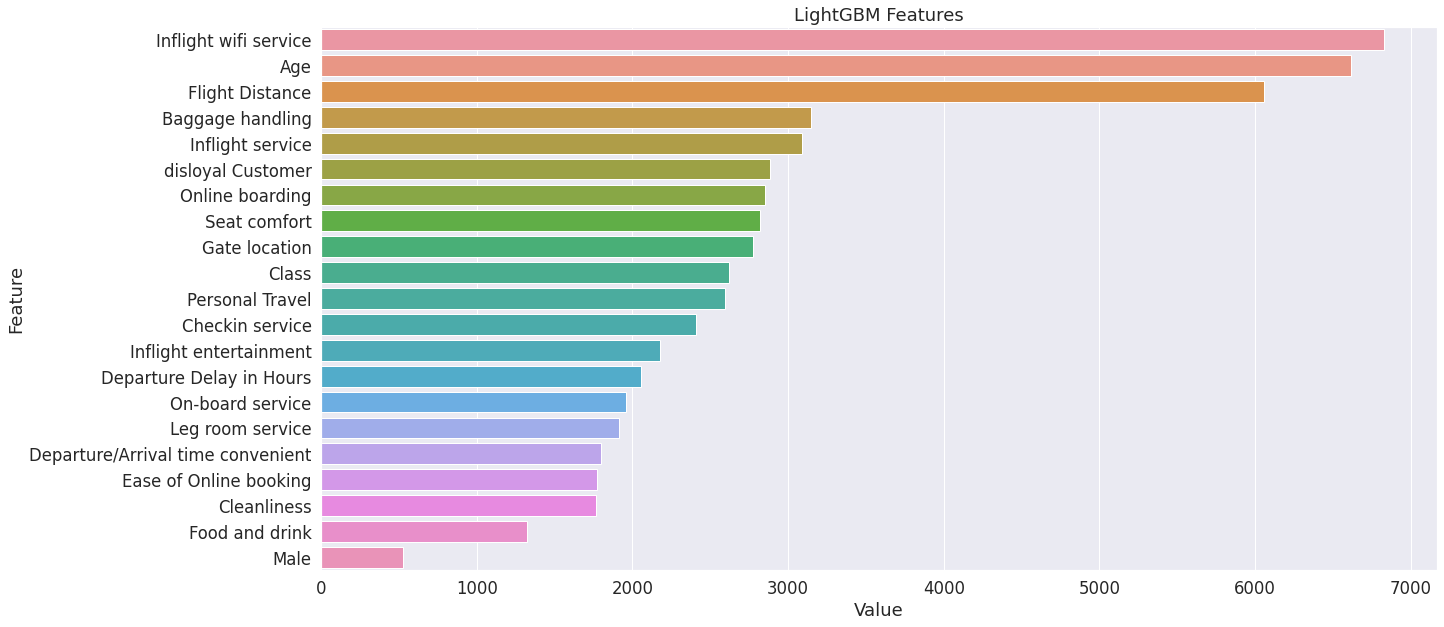

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sorted(zip(clf.feature_importances_, X.columns), reverse=True)
feature_imp = pd.DataFrame(sorted(zip(LGBM.feature_importances_,x1_train.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features')
# plt.tight_layout()
plt.show()

## PCA

In [64]:
x1_train.head()

,Male,disloyal Customer,Personal Travel,Class,Age,Flight Distance,Departure Delay in Hours,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,1,0,1,1,-1.745279,-0.731539,0.4,0.203579,0.616172,0.173776,...,1.352264,-0.185532,1.183099,1.231704,0.479403,-0.26684,0.311769,0.549799,1.156436,1.305870
1,1,1,0,2,-0.951360,-0.957184,0.0,0.203579,-0.695245,0.173776,...,-1.656326,-0.185532,-1.849315,-1.769081,-1.849161,1.25338,-0.535045,-1.821012,0.305848,-1.742292
2,0,0,0,2,-0.885200,-0.047584,0.0,-0.549533,-0.695245,-0.541060,...,1.352264,1.296496,1.183099,1.231704,0.479403,-0.26684,0.311769,0.549799,0.305848,1.305870
3,0,0,0,2,-0.951360,-0.629246,0.2,-0.549533,1.271880,1.603448,...,-0.904178,-0.926545,-1.091211,-1.018885,-1.072973,1.25338,-0.535045,-1.821012,0.305848,-0.980251
4,1,0,0,2,1.430397,-0.978244,0.0,0.203579,-0.039537,0.173776,...,0.600117,1.296496,1.183099,-0.268688,-0.296785,0.49327,0.311769,-0.240472,-0.544740,-0.218211


In [65]:
from sklearn.decomposition import PCA
pca = PCA()
service_pca = pca.fit_transform(x1_train[[    
        'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking',   # 14개 척도
        'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']])

In [66]:
result = pd.DataFrame({'설명가능한 분산 비율':pca.explained_variance_,
             '기여율':pca.explained_variance_ratio_},
         index=np.array([f"pca{num+1}" for num in range(14)])) 
result['누적기여율'] = result['기여율'].cumsum()
result

,설명가능한 분산 비율,기여율,누적기여율
pca1,3.800153,0.271437,0.271437
pca2,2.362009,0.168713,0.440150
pca3,2.165913,0.154707,0.594857
pca4,1.063284,0.075948,0.670805
pca5,0.950940,0.067924,0.738729
pca6,0.700342,0.050024,0.788753
pca7,0.539962,0.038568,0.827321
pca8,0.514660,0.036761,0.864082
pca9,0.469479,0.033534,0.897616
pca10,0.368664,0.026333,0.923949


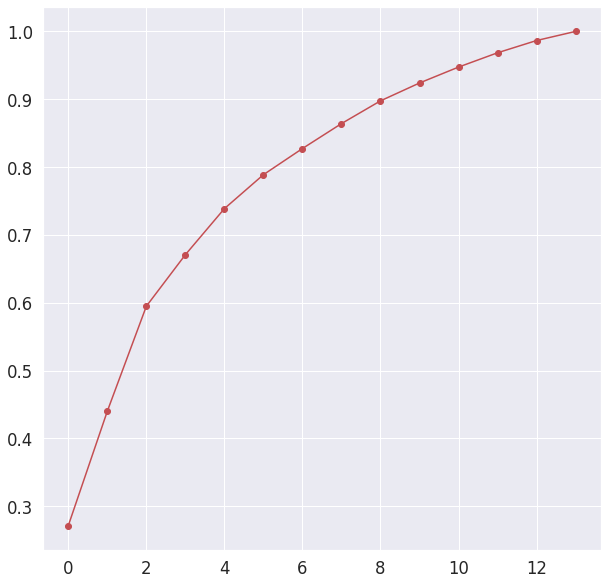

In [67]:
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')


In [68]:
pca_new = PCA(n_components=10)
service_pca_new = pd.DataFrame(pca_new.fit_transform(x1_train[[    
        'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking',   # 14개 척도
        'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']]), columns = ['PC1', 'PC2','PC3', 'PC4','PC5', 'PC6','PC7', 'PC8','PC9', 'PC10'])

In [69]:
service_pca_new.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-2.362768,1.263450,0.431996,0.257516,-0.394430,0.726245,-0.955273,-1.147708,-0.193172,-0.599217
1,3.197085,-1.282345,-1.160884,-0.774900,2.011951,-1.099748,0.377570,-0.512314,1.064792,-0.845236
2,-2.175759,1.920269,1.032377,-0.557696,-0.264665,0.581479,0.037154,0.201451,0.130877,-0.006828
3,1.739995,-2.523169,-0.717645,1.483868,1.245230,-1.383265,-0.283125,0.089957,0.798967,-0.757841
4,-0.759819,-0.214656,0.832187,-0.827860,0.295756,-0.341148,-0.139381,0.383835,0.810964,0.522423


In [70]:
service_pca_new.shape

(103904, 10)

In [71]:
x1_train.head()

,Male,disloyal Customer,Personal Travel,Class,Age,Flight Distance,Departure Delay in Hours,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,1,0,1,1,-1.745279,-0.731539,0.4,0.203579,0.616172,0.173776,...,1.352264,-0.185532,1.183099,1.231704,0.479403,-0.26684,0.311769,0.549799,1.156436,1.305870
1,1,1,0,2,-0.951360,-0.957184,0.0,0.203579,-0.695245,0.173776,...,-1.656326,-0.185532,-1.849315,-1.769081,-1.849161,1.25338,-0.535045,-1.821012,0.305848,-1.742292
2,0,0,0,2,-0.885200,-0.047584,0.0,-0.549533,-0.695245,-0.541060,...,1.352264,1.296496,1.183099,1.231704,0.479403,-0.26684,0.311769,0.549799,0.305848,1.305870
3,0,0,0,2,-0.951360,-0.629246,0.2,-0.549533,1.271880,1.603448,...,-0.904178,-0.926545,-1.091211,-1.018885,-1.072973,1.25338,-0.535045,-1.821012,0.305848,-0.980251
4,1,0,0,2,1.430397,-0.978244,0.0,0.203579,-0.039537,0.173776,...,0.600117,1.296496,1.183099,-0.268688,-0.296785,0.49327,0.311769,-0.240472,-0.544740,-0.218211


In [72]:
x1_train.iloc[:,:7].head(10)

,Male,disloyal Customer,Personal Travel,Class,Age,Flight Distance,Departure Delay in Hours
0,1,0,1,1,-1.745279,-0.731539,0.4
1,1,1,0,2,-0.951360,-0.957184,0.0
2,0,0,0,2,-0.885200,-0.047584,0.0
3,0,0,0,2,-0.951360,-0.629246,0.2
4,1,0,0,2,1.430397,-0.978244,0.0
5,0,0,1,0,-0.885200,-0.009475,0.0
6,1,0,1,0,0.504158,0.086800,0.2
7,0,0,0,2,0.834958,0.847975,0.1
8,0,0,0,2,0.107199,-0.337413,0.0
9,1,1,0,0,-1.282160,-0.128816,0.0


In [73]:
x_p_train = pd.concat([x1_train.iloc[:,:7], service_pca_new], axis = 1)

In [74]:
x_p_train.head(10)

,Male,disloyal Customer,Personal Travel,Class,Age,Flight Distance,Departure Delay in Hours,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,1,0,1,1,-1.745279,-0.731539,0.4,-2.362768,1.263450,0.431996,0.257516,-0.394430,0.726245,-0.955273,-1.147708,-0.193172,-0.599217
1,1,1,0,2,-0.951360,-0.957184,0.0,3.197085,-1.282345,-1.160884,-0.774900,2.011951,-1.099748,0.377570,-0.512314,1.064792,-0.845236
2,0,0,0,2,-0.885200,-0.047584,0.0,-2.175759,1.920269,1.032377,-0.557696,-0.264665,0.581479,0.037154,0.201451,0.130877,-0.006828
3,0,0,0,2,-0.951360,-0.629246,0.2,1.739995,-2.523169,-0.717645,1.483868,1.245230,-1.383265,-0.283125,0.089957,0.798967,-0.757841
4,1,0,0,2,1.430397,-0.978244,0.0,-0.759819,-0.214656,0.832187,-0.827860,0.295756,-0.341148,-0.139381,0.383835,0.810964,0.522423
5,0,0,1,0,-0.885200,-0.009475,0.0,2.576713,-0.404441,-2.465618,-0.999257,-0.521458,-0.260757,-0.958134,-1.261453,0.075463,-0.043337
6,1,0,1,0,0.504158,0.086800,0.2,1.652393,-0.218912,-1.686852,0.724134,-0.318219,0.366212,-0.169151,-0.412856,0.567900,-0.681321
7,0,0,0,2,0.834958,0.847975,0.1,-3.670087,-0.432001,-0.491487,-0.193356,0.381345,-0.216199,0.512535,0.296082,-0.106721,0.043057
8,0,0,0,2,0.107199,-0.337413,0.0,3.430302,0.689876,2.421275,-1.018382,-1.140946,-0.684180,-0.017203,-0.308687,-0.474176,0.029132
9,1,1,0,0,-1.282160,-0.128816,0.0,1.422932,-1.113512,-0.254928,-0.270748,-0.680295,-0.315108,0.909453,-0.111321,0.640982,0.454495


In [75]:
service_pca_test = pd.DataFrame(pca_new.transform(x1_test[[    
        'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking',   # 14개 척도
        'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']]), columns = ['PC1', 'PC2','PC3', 'PC4','PC5', 'PC6','PC7', 'PC8','PC9', 'PC10'])

In [76]:
service_pca_test.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-2.587097,-0.971727,-1.171948,0.658357,1.564653,0.069170,-0.229454,0.149438,0.029554,0.069409
1,-1.489706,2.430766,0.714062,-0.677361,0.678414,-0.010796,-0.188808,-0.022872,0.095284,0.014340
2,3.035460,0.327892,0.160551,0.191784,0.666743,1.135315,1.414742,1.302265,-1.107290,0.875728
3,3.510365,2.454895,3.244527,-1.214180,-0.759387,0.015768,0.522092,1.064202,0.503424,0.002869
4,2.048192,-0.356677,1.577383,0.634053,-0.942465,-0.399892,0.346275,-1.127120,-1.299280,0.125270


In [77]:
service_pca_test.shape

(25976, 10)

In [78]:
x_p_test = pd.concat([x1_test.iloc[:,:7], service_pca_test], axis = 1)

In [79]:
x_p_test.head()

,Male,disloyal Customer,Personal Travel,Class,Age,Flight Distance,Departure Delay in Hours,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,0,0,0,0,0.834958,-1.032398,0.8,-2.587097,-0.971727,-1.171948,0.658357,1.564653,0.069170,-0.229454,0.149438,0.029554,0.069409
1,0,0,0,2,-0.223601,1.678348,0.0,-1.489706,2.430766,0.714062,-0.677361,0.678414,-0.010796,-0.188808,-0.022872,0.095284,0.014340
2,1,1,0,0,-1.282160,-1.000307,0.0,3.035460,0.327892,0.160551,0.191784,0.666743,1.135315,1.414742,1.302265,-1.107290,0.875728
3,1,0,0,2,0.305678,2.193821,0.0,3.510365,2.454895,3.244527,-1.214180,-0.759387,0.015768,0.522092,1.064202,0.503424,0.002869
4,0,0,0,0,0.636478,-0.007470,0.0,2.048192,-0.356677,1.577383,0.634053,-0.942465,-0.399892,0.346275,-1.127120,-1.299280,0.125270


In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
lr = LogisticRegression()
lr.fit(x_p_train, y_train)
lr_predict = lr.predict(x_p_test)

#print confusion matrix and accuracy score
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print(lr_conf_matrix)
print(lr_acc_score*100)

[[13102  1471]
 [ 1936  9467]]
86.88404681244225


In [81]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_p_train,y_train)
dt_predict = dt.predict(x_p_test)

#print confusion matrix and accuracy score
dt_conf_matrix = confusion_matrix(y_test, dt_predict)
dt_acc_score = accuracy_score(y_test, dt_predict)
print(dt_conf_matrix)
print(dt_acc_score*100)

[[13289  1284]
 [ 1192 10211]]
90.46812442254388


In [82]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_p_train,y_train)
nb_predict=nb.predict(x_p_test)

#print confusion matrix and accuracy score
nb_conf_matrix = confusion_matrix(y_test, nb_predict)
nb_acc_score = accuracy_score(y_test, nb_predict)
print(nb_conf_matrix)
print(nb_acc_score*100)

[[12286  2287]
 [ 2648  8755]]
81.00169387126577


In [83]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_p_train, y_train)
rf_predict=rf.predict(x_p_test)

#print confusion matrix and accuracy score
rf_conf_matrix = confusion_matrix(y_test, rf_predict)
rf_acc_score = accuracy_score(y_test, rf_predict)
print(rf_conf_matrix)
print(rf_acc_score*100)

[[14014   559]
 [ 1036 10367]]
93.85971666153372


In [ ]:
stack_data = pd.DataFrame([lr_predict,nb_predict, dt_predict, rf_predict,knn_predict])
stack_data.shape

In [ ]:
stack_data = np.transpose(stack_data)
stack_data.shape

In [ ]:
stack_data[:10]

In [85]:
lgbm = LGBMClassifier()
lgbm.fit(stack_data, y_test)
lgbm_predict = lgbm.predict(stack_data)
lgbm_acc_score = accuracy_score(y_test, lgbm_predict)
print(lgbm_acc_score*100)

NameError: ignored

In [86]:
cut_features = ["Male", "Food and drink",]

x1_train = x1_train.drop(columns=cut_features)
x1_test = x1_test.drop(columns=cut_features)

In [91]:
LGBM2 = LGBMClassifier(boosting_type="gbdt", n_estimators=3000, learning_rate=0.01, early_stopping_round=30)
LGBM2.fit(x1_train, y_train, eval_set=(x1_test, y_test), eval_metric="auc")
Y_predict = LGBM2.predict(x1_test)

accuracy_score(y_test, Y_predict), precision_score(y_test, Y_predict), recall_score(y_test, Y_predict), roc_auc_score(y_test, Y_predict), average_precision_score(y_test, Y_predict)

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's auc: 0.973529	valid_0's binary_logloss: 0.677885
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.973595	valid_0's binary_logloss: 0.67019
[3]	valid_0's auc: 0.973602	valid_0's binary_logloss: 0.662645
[4]	valid_0's auc: 0.973602	valid_0's binary_logloss: 0.655253
[5]	valid_0's auc: 0.973912	valid_0's binary_logloss: 0.647999
[6]	valid_0's auc: 0.973881	valid_0's binary_logloss: 0.640897
[7]	valid_0's auc: 0.97383	valid_0's binary_logloss: 0.633924
[8]	valid_0's auc: 0.973845	valid_0's binary_logloss: 0.627082
[9]	valid_0's auc: 0.973853	valid_0's binary_logloss: 0.620382
[10]	valid_0's auc: 0.973901	valid_0's binary_logloss: 0.613799
[11]	valid_0's auc: 0.973903	valid_0's binary_logloss: 0.607339
[12]	valid_0's auc: 0.973952	valid_0's binary_logloss: 0.601009
[13]	valid_0's auc: 0.973985	valid_0's binary_logloss: 0.594791
[14]	valid_0's auc: 0.97399	valid_0's binary_logloss: 0.588691
[15]	valid_0's auc: 0.97407	valid_0's binary_logloss: 

(0.9647751770865414,
 0.975603119898422,
 0.9433482416907831,
 0.962444724015638,
 0.9452025976918627)